## Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [2]:
raw_data = pd.read_csv("./dataframe_.csv")

In [3]:
raw_data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


## EDA and Data Cleaning

### Check for `null` values

In [5]:
raw_data.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
raw_data.loc[raw_data["input"].isnull()]

,input,output
1439,NaN,NaN


In [7]:
raw_data.dropna(inplace=True)

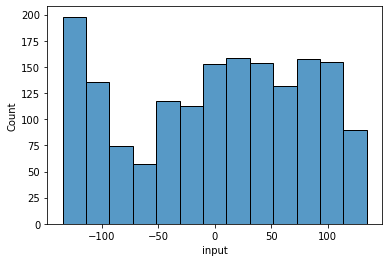

In [8]:
sns.histplot(data=raw_data, x="input")
plt.show()

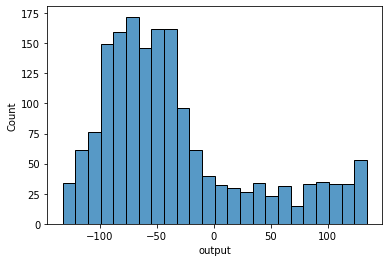

In [9]:
sns.histplot(data=raw_data, x="output")
plt.show()

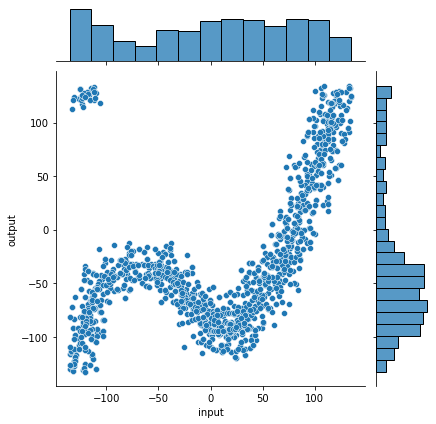

In [10]:
sns.jointplot(data=raw_data, x="input", y="output")

- There is a cluster of outliers which needs to be removed

### Remove outliers

In [11]:
outliers = (raw_data["input"] < -100) & (raw_data["output"] > 100)
cleaned_data = raw_data.loc[~outliers]

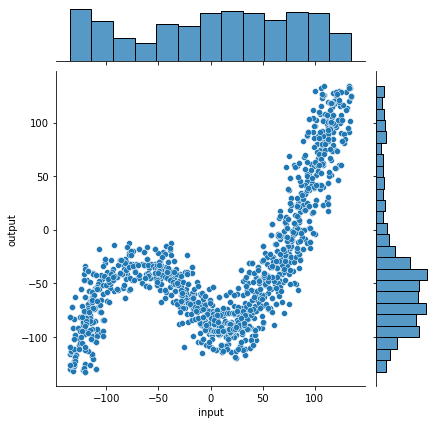

In [12]:
sns.jointplot(data=cleaned_data, x="input", y="output")

## Train-Test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = cleaned_data.drop("output", axis=1)
y = cleaned_data["output"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=144)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1242, 1)
Test size: (415, 1)


## Modeling

In [16]:
from sklearn import metrics

In [17]:
eval_metrics = {
    "MSE": metrics.mean_squared_error,
    "MAE": metrics.mean_absolute_error,
    "MAPE": metrics.mean_absolute_percentage_error
}

In [18]:
models = pd.DataFrame(columns=["algorithm", "metric", "train_error", "test_error"])

### Linear model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

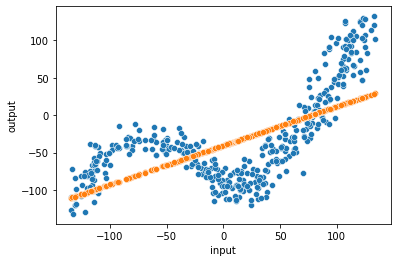

In [22]:
sns.scatterplot(x=X_test["input"], y=y_test)
sns.scatterplot(x=X_test["input"], y=y_test_pred_lr)
plt.show()

In [23]:
for name, func in eval_metrics.items():
    models = models.append({
        "algorithm": "lr",
        "metric": name,
        "train_error": func(y_train, y_train_pred_lr),
        "test_error": func(y_test, y_test_pred_lr)
    }, ignore_index=True)

### SVM

In [24]:
from sklearn.svm import SVR

In [25]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [26]:
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

In [27]:
for name, func in eval_metrics.items():
    models = models.append({
        "algorithm": "svm",
        "metric": name,
        "train_error": func(y_train, y_train_pred_svm),
        "test_error": func(y_test, y_test_pred_svm)
    }, ignore_index=True)

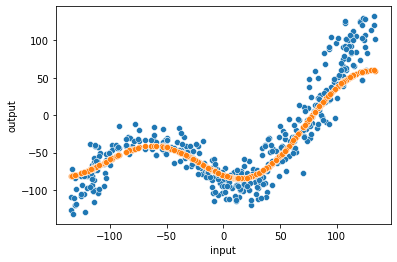

In [28]:
sns.scatterplot(x=X_test["input"], y=y_test)
sns.scatterplot(x=X_test["input"], y=y_test_pred_svm)
plt.show()

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

In [32]:
for name, func in eval_metrics.items():
    models = models.append({
        "algorithm": "dt",
        "metric": name,
        "train_error": func(y_train, y_train_pred_dt),
        "test_error": func(y_test, y_test_pred_dt)
    }, ignore_index=True)

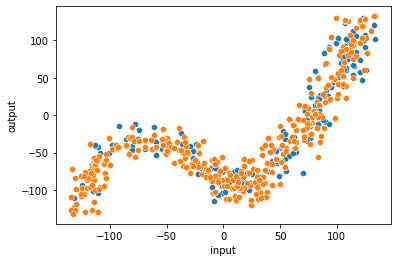

In [33]:
sns.scatterplot(x=X_test["input"], y=y_test)
sns.scatterplot(x=X_test["input"], y=y_test_pred_dt)
plt.show()

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [37]:
for name, func in eval_metrics.items():
    models = models.append({
        "algorithm": "rf",
        "metric": name,
        "train_error": func(y_train, y_train_pred_rf),
        "test_error": func(y_test, y_test_pred_rf)
    }, ignore_index=True)

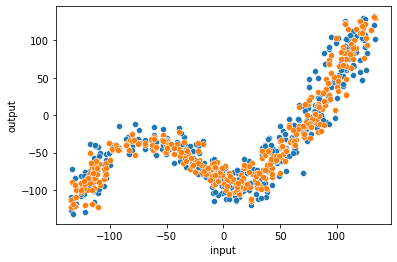

In [38]:
sns.scatterplot(x=X_test["input"], y=y_test)
sns.scatterplot(x=X_test["input"], y=y_test_pred_rf)
plt.show()

## Model comparision

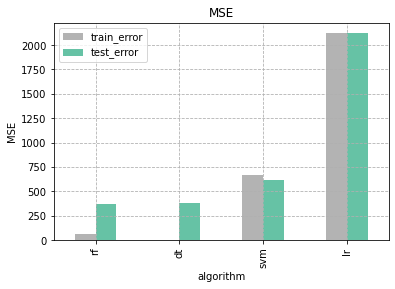

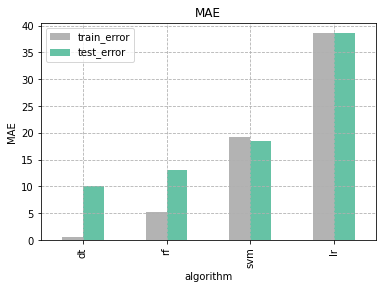

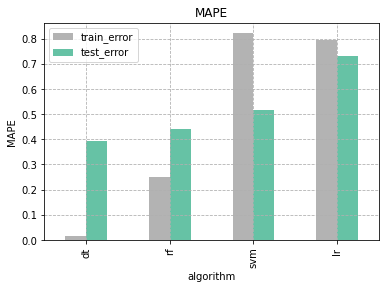

In [39]:
for m in eval_metrics:
    metric = models.loc[models.metric==m].sort_values(by="test_error").set_index("algorithm")
    metric.plot(kind="bar", colormap="Set2_r", title=m.upper())
    plt.grid(linestyle="--")
    plt.ylabel(m.upper())
    plt.show()

**Observations:**
- Decision tree and Random forest algorithms produce the least `MAPE` on test data but are overfit.
- Linear model produced large test error comparitively but is more generalizable compared to others.